# **Importing Dependencies**

In [1]:
!pip install pyseoanalyzer

In [2]:
import pandas as pd
import json
import re
import numpy as np
from seoanalyzer import analyze
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import nltk
nltk.download('punkt')
from nltk import word_tokenize
import string
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import math

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# **Collecting Text Content From Website**

In [3]:
# For fetching all URL's
from seoanalyzer import analyze
output = analyze("https://www.dashclicks.com","https://www.dashclicks.com/sitemap_index.xml")
a_file = open("dashclicks.json", "w")
json.dump(output, a_file)
a_file.close()

In [4]:
output.keys()

dict_keys(['pages', 'keywords', 'errors', 'total_time', 'duplicate_pages'])

In [5]:
result = pd.DataFrame(output["pages"])
result.head()

,url,title,description,word_count,keywords,bigrams,trigrams,warnings,social,content_hash
0,https://www.dashclicks.com/post-sitemap.xml,No Title,,50,[],"{'https www': 2, 'www dashclicks': 2, 'dashcli...","{'https www dashclicks': 2, 'www dashclicks co...",[Title tag is too short (less than 10 characte...,"{'facebook': {'shares': 0, 'comments': 0, 'lik...",f30c65c25c80a1429de87d07c7774f1a71115f9c
1,https://www.dashclicks.com/page-sitemap.xml,No Title,,224,"[(37, 00), (18, www), (18, https), (18, dashcl...","{'https www': 18, 'www dashclicks': 18, 'dashc...","{'https www dashclicks': 18, 'www dashclicks c...",[Title tag is too short (less than 10 characte...,"{'facebook': {'shares': 0, 'comments': 0, 'lik...",cead3a470ce0ce8acd44ac26fb2305c87ca40acb
2,https://www.dashclicks.com/platforms-sitemap.xml,No Title,,113,"[(16, 00), (8, www), (8, platform), (8, https)...","{'https www': 8, 'www dashclicks': 8, 'dashcli...","{'https www dashclicks': 8, 'www dashclicks co...",[Title tag is too short (less than 10 characte...,"{'facebook': {'shares': 0, 'comments': 0, 'lik...",6715d0032634d01a87bbaf1b7f9aec2c17ff0a7f
3,https://www.dashclicks.com/fulfillment-sitemap...,No Title,,112,"[(16, 00), (8, www), (8, https), (8, fulfillme...","{'https www': 8, 'www dashclicks': 8, 'dashcli...","{'https www dashclicks': 8, 'www dashclicks co...",[Title tag is too short (less than 10 characte...,"{'facebook': {'shares': 0, 'comments': 0, 'lik...",cdfe1413223672c2280b88e1dccf6eb6320f3a1e
4,https://www.dashclicks.com/tools-sitemap.xml,No Title,,40,"[(6, 00)]","{'https www': 3, 'www dashclicks': 3, 'dashcli...","{'https www dashclicks': 3, 'www dashclicks co...",[Title tag is too short (less than 10 characte...,"{'facebook': {'shares': 0, 'comments': 0, 'lik...",d5cc2667f01202e5292ab92e30b7acfe01451d9e


In [6]:
demo = result['url']
urls=np.array(demo).tolist()
len(urls) # Total number of links present

219

In [7]:
for url  in urls:
    # You can access the url in this loop with the name 'url'
    page = urlopen(url)
    soup = BeautifulSoup(page, "html.parser")
    for script in soup(["script", "style"]):
        script.extract()

#get text
text = soup.get_text()
#break into lines and remove leading and trailing space on each
lines = (line.strip() for line in text.splitlines())
#break multi-headlines into a line each
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
#drop blank lines
Text = '\n'.join(chunk for chunk in chunks if chunk)

In [8]:
Text[:1000]

'White-Label Solutions for Digital Marketing Agencies | DashClicks\nPlatform PlatformOur platform rescues agencies from the everyday grind, freeing them to achieve more.White LabeledEquipping agencies of all sizes with the tools and platform they need to succeed, all under their brand.Client DashboardsCreate a truly transformational experience for your clients, all from one simple login.Real-Time ReportingCreate transparency with clients by tracking and reporting metrics from campaigns in real-time. Onboarding CenterAutomatically gather the most important information from your clients through our intelligent onboarding process.Fulfillment StoreEasily order and fulfill white-label services for clients through one centralized system, all under your brand. Billing Center Easily update, manage and cancel subscriptions all from one dashboard.User ManagementControl your entire team, along with your clients through custom permissions and role management.Affiliate CenterCreate an automated str

# **Cleaning Text Processing**

In [9]:
def clean(text):
    text = text.lower()
    printable = set(string.printable)
    text = filter(lambda x: x in printable, text)
    text = "".join(list(text))
    return text

Cleaned_text = clean(Text)
# print(Cleaned_text)
text = word_tokenize(Cleaned_text)
text[:10]

['white-label',
 'solutions',
 'for',
 'digital',
 'marketing',
 'agencies',
 '|',
 'dashclicks',
 'platform',
 'platformour']

In [10]:
POS_tag = nltk.pos_tag(text)
print ("Tokenized Text with POS tags: \n")
print (POS_tag)

Tokenized Text with POS tags: 

[('white-label', 'JJ'), ('solutions', 'NNS'), ('for', 'IN'), ('digital', 'JJ'), ('marketing', 'NN'), ('agencies', 'NNS'), ('|', 'VBP'), ('dashclicks', 'NNS'), ('platform', 'VB'), ('platformour', 'JJ'), ('platform', 'NN'), ('rescues', 'NNS'), ('agencies', 'NNS'), ('from', 'IN'), ('the', 'DT'), ('everyday', 'JJ'), ('grind', 'NN'), (',', ','), ('freeing', 'VBG'), ('them', 'PRP'), ('to', 'TO'), ('achieve', 'VB'), ('more.white', 'NN'), ('labeledequipping', 'VBG'), ('agencies', 'NNS'), ('of', 'IN'), ('all', 'DT'), ('sizes', 'NNS'), ('with', 'IN'), ('the', 'DT'), ('tools', 'NNS'), ('and', 'CC'), ('platform', 'NN'), ('they', 'PRP'), ('need', 'VBP'), ('to', 'TO'), ('succeed', 'VB'), (',', ','), ('all', 'DT'), ('under', 'IN'), ('their', 'PRP$'), ('brand.client', 'NN'), ('dashboardscreate', 'VB'), ('a', 'DT'), ('truly', 'JJ'), ('transformational', 'JJ'), ('experience', 'NN'), ('for', 'IN'), ('your', 'PRP$'), ('clients', 'NNS'), (',', ','), ('all', 'DT'), ('from', '

In [11]:
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

adjective_tags = ['JJ','JJR','JJS']

lemmatized_text = []

for word in POS_tag:
    if word[1] in adjective_tags:
        lemmatized_text.append(str(wordnet_lemmatizer.lemmatize(word[0],pos="a")))
        
    else:
        lemmatized_text.append(str(wordnet_lemmatizer.lemmatize(word[0]))) #default POS = noun
        
print ("Text tokens after lemmatization of adjectives and nouns: \n")
print (lemmatized_text)

Text tokens after lemmatization of adjectives and nouns: 

['white-label', 'solution', 'for', 'digital', 'marketing', 'agency', '|', 'dashclicks', 'platform', 'platformour', 'platform', 'rescue', 'agency', 'from', 'the', 'everyday', 'grind', ',', 'freeing', 'them', 'to', 'achieve', 'more.white', 'labeledequipping', 'agency', 'of', 'all', 'size', 'with', 'the', 'tool', 'and', 'platform', 'they', 'need', 'to', 'succeed', ',', 'all', 'under', 'their', 'brand.client', 'dashboardscreate', 'a', 'truly', 'transformational', 'experience', 'for', 'your', 'client', ',', 'all', 'from', 'one', 'simple', 'login.real-time', 'reportingcreate', 'transparency', 'with', 'client', 'by', 'tracking', 'and', 'reporting', 'metric', 'from', 'campaign', 'in', 'real-time', '.', 'onboarding', 'centerautomatically', 'gather', 'the', 'most', 'important', 'information', 'from', 'your', 'client', 'through', 'our', 'intelligent', 'onboarding', 'process.fulfillment', 'storeeasily', 'order', 'and', 'fulfill', 'white-la

In [12]:
POS_tag = nltk.pos_tag(lemmatized_text)

print ("Lemmatized text with POS tags: \n")
print (POS_tag)

Lemmatized text with POS tags: 

[('white-label', 'JJ'), ('solution', 'NN'), ('for', 'IN'), ('digital', 'JJ'), ('marketing', 'NN'), ('agency', 'NN'), ('|', 'NNP'), ('dashclicks', 'VBZ'), ('platform', 'VB'), ('platformour', 'JJ'), ('platform', 'NN'), ('rescue', 'NN'), ('agency', 'NN'), ('from', 'IN'), ('the', 'DT'), ('everyday', 'JJ'), ('grind', 'NN'), (',', ','), ('freeing', 'VBG'), ('them', 'PRP'), ('to', 'TO'), ('achieve', 'VB'), ('more.white', 'NN'), ('labeledequipping', 'VBG'), ('agency', 'NN'), ('of', 'IN'), ('all', 'DT'), ('size', 'NN'), ('with', 'IN'), ('the', 'DT'), ('tool', 'NN'), ('and', 'CC'), ('platform', 'NN'), ('they', 'PRP'), ('need', 'VBP'), ('to', 'TO'), ('succeed', 'VB'), (',', ','), ('all', 'DT'), ('under', 'IN'), ('their', 'PRP$'), ('brand.client', 'NN'), ('dashboardscreate', 'VB'), ('a', 'DT'), ('truly', 'JJ'), ('transformational', 'JJ'), ('experience', 'NN'), ('for', 'IN'), ('your', 'PRP$'), ('client', 'NN'), (',', ','), ('all', 'DT'), ('from', 'IN'), ('one', 'CD'

In [13]:
stopwords = []

wanted_POS = ['NN','NNS','NNP','NNPS','JJ','JJR','JJS','VBG','FW'] 

for word in POS_tag:
    if word[1] not in wanted_POS:
        stopwords.append(word[0])

punctuations = list(str(string.punctuation))

stopwords = stopwords + punctuations

In [14]:
!wget https://gist.githubusercontent.com/larsyencken/1440509/raw/53273c6c202b35ef00194d06751d8ef630e53df2/stopwords.txt

--2020-10-28 08:33:52--  https://gist.githubusercontent.com/larsyencken/1440509/raw/53273c6c202b35ef00194d06751d8ef630e53df2/stopwords.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2631 (2.6K) [text/plain]
Saving to: ‘stopwords.txt’

stopwords.txt       100%[===================>]   2.57K  --.-KB/s    in 0s      

2020-10-28 08:33:52 (37.1 MB/s) - ‘stopwords.txt’ saved [2631/2631]



In [15]:
stopword_file = open("stopwords.txt", "r")


lots_of_stopwords = []

for line in stopword_file.readlines():
    lots_of_stopwords.append(str(line.strip()))

stopwords_plus = []
stopwords_plus = stopwords + lots_of_stopwords
stopwords_plus = set(stopwords_plus)

In [16]:
processed_text = []
for word in lemmatized_text:
    if word not in stopwords_plus:
        processed_text.append(word)
print (processed_text)

['white-label', 'solution', 'digital', 'marketing', 'agency', 'platformour', 'rescue', 'agency', 'everyday', 'grind', 'freeing', 'more.white', 'labeledequipping', 'agency', 'size', 'tool', 'brand.client', 'transformational', 'experience', 'client', 'simple', 'login.real-time', 'reportingcreate', 'transparency', 'client', 'tracking', 'reporting', 'metric', 'campaign', 'real-time', 'onboarding', 'information', 'client', 'intelligent', 'onboarding', 'process.fulfillment', 'white-label', 'service', 'client', 'centralized', 'system', 'brand', 'billing', 'center', 'update', 'manage', 'cancel', 'subscription', 'dashboard.user', 'entire', 'team', 'client', 'custom', 'permission', 'role', 'management.affiliate', 'automated', 'stream', 'income', 'sharing', 'world', 'access', 'free', 'using', 'fulfillment', 'fulfillmentoutsource', 'digital', 'marketing', 'service', 'roof', 'purchase', 'service', 'client', 'campaign', 'store.facebook', 'adsdrive', 'sale', 'lead', 'utilizing', 'instagram', 'ad', 's

In [17]:
vocabulary = list(set(processed_text))
print (vocabulary)

['marketing', 'fulfilling', 'groupjoin', 'sharing', 'option', 'workflow', 'full-blown', 'florida', 'brand', 'system', 'worldwide', 'environment', 'buildinggoogle', 'online', 'method', 'movement.contact', 'fly', 'reporting', 'niche', 'revenue', 'private', 'blueprint', 'organizing', 'login', 'starting', 'ryan', 'companycompanysecuritydashconnectcontact', 'education', 'podcastdash', 'white', 'grind', 'multi-channel', 'uscompanysecuritydashconnectdashclicks', 'successful', 'campaign', 'entering', 'stunning', 'designcustom', 'blitzmetrics', 'introducing', 'building', 'adsdrive', 'industry', 'customer', 'deal', 'dollar', 'universitydash', 'multi-step', 'onboarding', 'utilizing', 'end-to-end', 'security', 'listingswebsite', 'label', 'postingdirectory', 'mangat', 'look', 'answer', 'directory', 'sale', 'labeledequipping', 'centerprivate', 'tribe', 'credit', 'beautiful', 'instasite', 'more.dash', 'heavy', 'ad', 'update', 'real-time', 'solution', 'seconds.instareportsinstareports', 'stewman', 'ya

# **Applying Text Ranking**

In [18]:
vocab_len = len(vocabulary)

weighted_edge = np.zeros((vocab_len,vocab_len),dtype=np.float32)

score = np.zeros((vocab_len),dtype=np.float32)
window_size = 3
covered_coocurrences = []

# making word vector by using co-occurence matrix
for i in range(0,vocab_len):
    score[i]=1
    for j in range(0,vocab_len):
        if j==i:
            weighted_edge[i][j]=0
        else:
            for window_start in range(0,(len(processed_text)-window_size)):
                
                window_end = window_start+window_size
                
                window = processed_text[window_start:window_end]
                
                if (vocabulary[i] in window) and (vocabulary[j] in window):
                    
                    index_of_i = window_start + window.index(vocabulary[i])
                    index_of_j = window_start + window.index(vocabulary[j])
                    
                    # index_of_x is the absolute position of the xth term in the window 
                    # (counting from 0) 
                    # in the processed_text
                      
                    if [index_of_i,index_of_j] not in covered_coocurrences:
                        weighted_edge[i][j]+=1/math.fabs(index_of_i-index_of_j)
                        covered_coocurrences.append([index_of_i,index_of_j])


In [19]:
inout = np.zeros((vocab_len),dtype=np.float32)

for i in range(0,vocab_len):
    for j in range(0,vocab_len):
        inout[i]+=weighted_edge[i][j]

In [20]:
MAX_ITERATIONS = 50
d=0.85
threshold = 0.0001 #convergence threshold

for iter in range(0,MAX_ITERATIONS):
    prev_score = np.copy(score)
    
    for i in range(0,vocab_len):
        
        summation = 0
        for j in range(0,vocab_len):
            if weighted_edge[i][j] != 0:
                summation += (weighted_edge[i][j]/inout[j])*score[j]
                
        score[i] = (1-d) + d*(summation)
    
    if np.sum(np.fabs(prev_score-score)) <= threshold: #convergence condition
        print("Converging at iteration "+str(iter)+"....")
        break

Converging at iteration 33....


In [21]:
for i in range(0,vocab_len):
    print("Score of "+vocabulary[i]+": "+str(score[i]))

Score of marketing: 5.665042
Score of fulfilling: 0.58243567
Score of groupjoin: 0.6149131
Score of sharing: 0.60790294
Score of option: 0.468171
Score of workflow: 0.47496414
Score of full-blown: 0.47412
Score of florida: 0.71637255
Score of brand: 1.5990618
Score of system: 1.8361454
Score of worldwide: 0.8563255
Score of environment: 0.52764285
Score of buildinggoogle: 1.1347698
Score of online: 0.7545683
Score of method: 0.51772934
Score of movement.contact: 0.7035066
Score of fly: 0.5699283
Score of reporting: 2.947302
Score of niche: 0.8561547
Score of revenue: 0.48418513
Score of private: 0.5634805
Score of blueprint: 0.53094125
Score of organizing: 0.49246478
Score of login: 0.8971605
Score of starting: 0.47635278
Score of ryan: 0.798589
Score of companycompanysecuritydashconnectcontact: 0.8510022
Score of education: 0.4688355
Score of podcastdash: 0.9256849
Score of white: 1.5553727
Score of grind: 0.90178823
Score of multi-channel: 0.6042417
Score of uscompanysecuritydashconn

In [22]:
phrases = []

phrase = " "
for word in lemmatized_text:
    
    if word in stopwords_plus:
        if phrase!= " ":
            phrases.append(str(phrase).strip().split())
        phrase = " "
    elif word not in stopwords_plus:
        phrase+=str(word)
        phrase+=" "

print("Partitioned Phrases (Candidate Keyphrases): \n")
print(phrases)

Partitioned Phrases (Candidate Keyphrases): 

[['white-label', 'solution'], ['digital', 'marketing', 'agency'], ['platformour'], ['rescue', 'agency'], ['everyday', 'grind'], ['freeing'], ['more.white', 'labeledequipping', 'agency'], ['size'], ['tool'], ['brand.client'], ['transformational', 'experience'], ['client'], ['simple', 'login.real-time', 'reportingcreate', 'transparency'], ['client'], ['tracking'], ['reporting', 'metric'], ['campaign'], ['real-time'], ['onboarding'], ['information'], ['client'], ['intelligent', 'onboarding', 'process.fulfillment'], ['white-label', 'service'], ['client'], ['centralized', 'system'], ['brand'], ['billing', 'center'], ['update'], ['manage'], ['cancel', 'subscription'], ['dashboard.user'], ['entire', 'team'], ['client'], ['custom', 'permission'], ['role', 'management.affiliate'], ['automated', 'stream'], ['income'], ['sharing'], ['world'], ['access'], ['free'], ['using'], ['fulfillment', 'fulfillmentoutsource'], ['digital', 'marketing', 'service'],

In [23]:
unique_phrases = []

for phrase in phrases:
    if phrase not in unique_phrases:
        unique_phrases.append(phrase)

print("Unique Phrases (Candidate Keyphrases): \n")
print(unique_phrases)

Unique Phrases (Candidate Keyphrases): 

[['white-label', 'solution'], ['digital', 'marketing', 'agency'], ['platformour'], ['rescue', 'agency'], ['everyday', 'grind'], ['freeing'], ['more.white', 'labeledequipping', 'agency'], ['size'], ['tool'], ['brand.client'], ['transformational', 'experience'], ['client'], ['simple', 'login.real-time', 'reportingcreate', 'transparency'], ['tracking'], ['reporting', 'metric'], ['campaign'], ['real-time'], ['onboarding'], ['information'], ['intelligent', 'onboarding', 'process.fulfillment'], ['white-label', 'service'], ['centralized', 'system'], ['brand'], ['billing', 'center'], ['update'], ['manage'], ['cancel', 'subscription'], ['dashboard.user'], ['entire', 'team'], ['custom', 'permission'], ['role', 'management.affiliate'], ['automated', 'stream'], ['income'], ['sharing'], ['world'], ['access'], ['free'], ['using'], ['fulfillment', 'fulfillmentoutsource'], ['digital', 'marketing', 'service'], ['roof'], ['purchase', 'service'], ['client', 'campa

In [24]:
for word in vocabulary:
    #print word
    for phrase in unique_phrases:
        if (word in phrase) and ([word] in unique_phrases) and (len(phrase)>1):
            #if len(phrase)>1 then the current phrase is multi-worded.
            #if the word in vocabulary is present in unique_phrases as a single-word-phrase
            # and at the same time present as a word within a multi-worded phrase,
            # then I will remove the single-word-phrase from the list.
            unique_phrases.remove([word])
            
print("Thinned Unique Phrases (Candidate Keyphrases): \n")
print(unique_phrases)    

Thinned Unique Phrases (Candidate Keyphrases): 

[['white-label', 'solution'], ['digital', 'marketing', 'agency'], ['platformour'], ['rescue', 'agency'], ['everyday', 'grind'], ['freeing'], ['more.white', 'labeledequipping', 'agency'], ['size'], ['brand.client'], ['transformational', 'experience'], ['simple', 'login.real-time', 'reportingcreate', 'transparency'], ['tracking'], ['reporting', 'metric'], ['intelligent', 'onboarding', 'process.fulfillment'], ['white-label', 'service'], ['centralized', 'system'], ['billing', 'center'], ['update'], ['manage'], ['cancel', 'subscription'], ['dashboard.user'], ['entire', 'team'], ['custom', 'permission'], ['role', 'management.affiliate'], ['automated', 'stream'], ['income'], ['sharing'], ['using'], ['fulfillment', 'fulfillmentoutsource'], ['digital', 'marketing', 'service'], ['roof'], ['purchase', 'service'], ['client', 'campaign'], ['store.facebook', 'adsdrive'], ['lead'], ['utilizing'], ['instagram', 'ad', 'service'], ['clients.funnel'], ['fu

In [25]:
phrase_scores = []
keywords = []
for phrase in unique_phrases:
    phrase_score=0
    keyword = ''
    for word in phrase:
        keyword += str(word)
        keyword += " "
        phrase_score+=score[vocabulary.index(word)]
    phrase_scores.append(phrase_score)
    keywords.append(keyword.strip())

i=0
for keyword in keywords:
    print ("Keyword: '"+str(keyword)+"', Score: "+str(phrase_scores[i]))
    i+=1

Keyword: 'white-label solution', Score: 5.558448791503906
Keyword: 'digital marketing agency', Score: 30.359670162200928
Keyword: 'platformour', Score: 0.4716877341270447
Keyword: 'rescue agency', Score: 22.131297945976257
Keyword: 'everyday grind', Score: 1.7648721933364868
Keyword: 'freeing', Score: 0.9505161046981812
Keyword: 'more.white labeledequipping agency', Score: 22.403414607048035
Keyword: 'size', Score: 1.0611306428909302
Keyword: 'brand.client', Score: 0.4779580533504486
Keyword: 'transformational experience', Score: 2.439281642436981
Keyword: 'simple login.real-time reportingcreate transparency', Score: 2.469983220100403
Keyword: 'tracking', Score: 0.5029093027114868
Keyword: 'reporting metric', Score: 4.1657410860061646
Keyword: 'intelligent onboarding process.fulfillment', Score: 2.5834881067276
Keyword: 'white-label service', Score: 6.951250791549683
Keyword: 'centralized system', Score: 2.918941378593445
Keyword: 'billing center', Score: 2.4078105688095093
Keyword: 'u

In [27]:
sorted_index = np.flip(np.argsort(phrase_scores),0)

keywords_num = 30

print("Keywords:\n")

for i in range(0,keywords_num):
    print(str(keywords[sorted_index[i]])+", ", end=' ')

Keywords:

transformational digital marketing agency thats,  successful digital marketing agency,  digital marketing agency,  free platformwhite labeledclient dashboardsreal-time reportingonboarding centerfulfillment storebilling centeruser managementaffiliate center fulfillmentfacebook adsfunnel buildinggoogle adsseosocial medium postingwebsite designdirectory listingscontent marketing toolsagency,  beautiful agency website,  digital agency dashboard,  agency website,  ultimate agency solution,  stunning white label agency,  agency solution,  agency tool,  agency automation tools.agency websitedashclicks,  entire agency,  company agency worldwide,  day agency workshop,  agency owner,  more.white labeledequipping agency,  agency owners.content bloglearn,  current freelancing agency,  agency worldwide,  rescue agency,  agency entering,  best-in-class agency,  innovative agency,  platformwhite labeledclient dashboardsreal-time reportingonboarding centerfulfillment storebilling centeruser

In [28]:
type(keywords)

list

In [30]:
keywords

['white-label solution',
 'digital marketing agency',
 'platformour',
 'rescue agency',
 'everyday grind',
 'freeing',
 'more.white labeledequipping agency',
 'size',
 'brand.client',
 'transformational experience',
 'simple login.real-time reportingcreate transparency',
 'tracking',
 'reporting metric',
 'intelligent onboarding process.fulfillment',
 'white-label service',
 'centralized system',
 'billing center',
 'update',
 'manage',
 'cancel subscription',
 'dashboard.user',
 'entire team',
 'custom permission',
 'role management.affiliate',
 'automated stream',
 'income',
 'sharing',
 'using',
 'fulfillment fulfillmentoutsource',
 'digital marketing service',
 'roof',
 'purchase service',
 'client campaign',
 'store.facebook adsdrive',
 'lead',
 'utilizing',
 'instagram ad service',
 'clients.funnel',
 'funnel building expert',
 'multi-step funnel',
 'clients.google adsour conversion',
 'google',
 'bing ad campaign',
 'clients.seoimpress',
 'multiple search term',
 'yahoo',
 'bing

In [32]:
#import pandas as pd
df = pd.DataFrame(keywords)

In [33]:
df.to_csv('keywords.csv') 


---
# **Visualization**

---

In [34]:
!pip install matplotlib
!pip install pandas
!pip install wordcloud

In [35]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
df=pd.read_csv("/content/keywords.csv")
comment_words=''
stopwords=set(STOPWORDS)

In [41]:
for val in df.Keywords:
  val=str(val)
  tokens=val.split()
  for i in range(len(tokens)):
    tokens[i]=tokens[i].lower()
  comment_words+=" ".join(tokens)+" "

In [42]:
wordcloud = WordCloud(width=800,height=600,background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

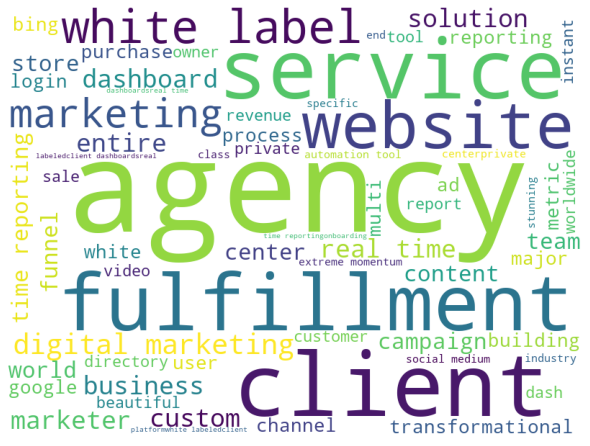

In [43]:
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()